# Data Preparation

In this sectiono we load in and prepare the data for our machine learning.

In [1]:
    # !pip install scipy
# !pip install pandas
# !pip install scikit-learn

You should consider upgrading via the 'C:\Users\argon\Documents\UTS\AI Capstone\AI Project\DeepNN\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\argon\Documents\UTS\AI Capstone\AI Project\DeepNN\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\argon\Documents\UTS\AI Capstone\AI Project\DeepNN\Scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
# !conda install -c conda-forge cudatoolkit=11.2 cudnn=8.1.0
# # Anything above 2.10 is not supported on the GPU on Windows Native
# !pip install "tensorflow<2.11"


In [3]:
# !pip list
# !pip install -q seaborn

Package                      Version
---------------------------- ------------
absl-py                      2.0.0
asttokens                    2.4.0
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.1
certifi                      2023.7.22
charset-normalizer           3.2.0
colorama                     0.4.6
comm                         0.1.4
contourpy                    1.1.1
cycler                       0.11.0
debugpy                      1.8.0
decorator                    5.1.1
exceptiongroup               1.1.3
executing                    1.2.0
flatbuffers                  23.5.26
fonttools                    4.42.1
gast                         0.4.0
google-auth                  2.23.1
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.58.0
h5py                         3.9.0
idna                         3.4
importlib-metadata           6.8.0
importlib-resources          6.1.0
ipy

You should consider upgrading via the 'C:\Users\argon\Documents\UTS\AI Capstone\AI Project\DeepNN\Scripts\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'C:\Users\argon\Documents\UTS\AI Capstone\AI Project\DeepNN\Scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
import os
import scipy.io as sio
import pandas as pd
from scipy.io import loadmat
import datetime
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

np.set_printoptions(precision=3, suppress=True)

## Ingesting the data

The following data is from a Nasa dataset with n refferring to the iteration number of the dataset used. 

    Voltage_measured: Fuel Cell terminal voltage (Volts)
    Current_measured: Fuel Cell output current (Amps)
    Temperature_measured: Fuel Cell temperature (degree C)
    Current_load: Current measured at load (Amps)
    Voltage_load: Voltage measured at load (Volts)
    Time: Time vector for the cycle (seconds)
    Capacity: Fuel Cell capacity (Ahr) for discharge till 2.7V
    Datetime: the date and time of the start of the cycle
    Ambient_temperature: Temperature in which the fuel cell is stored (degree C)
    Cycle: Charge cycle of the fuel cell


In [2]:
n = 'B0005'
df = pd.read_csv('data_frames/' + 'NASA_cycle_dataset_' + n +'.csv',
                 parse_dates = ["datetime"]).drop(["Unnamed: 0"], axis = 1)
df.head()

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,current,voltage,time,capacity
0,1,24,2008-04-02 13:08:17,3.873017,-0.001201,24.655358,0.000,0.003,0.000,NaN
1,1,24,2008-04-02 13:08:17,4.206466,0.060136,24.241571,0.057,4.250,5314.703,NaN
2,1,24,2008-04-02 13:08:17,4.206558,0.057209,24.230457,0.057,4.250,5329.485,NaN
3,1,24,2008-04-02 13:08:17,4.205512,0.050194,24.241984,0.047,4.245,5344.282,NaN
4,1,24,2008-04-02 13:08:17,4.205301,0.047004,24.226732,0.047,4.245,5359.141,NaN


## Beginning Data engineering

In the Below cells we are attempting to fill in the missing values. A brief look at the dataset showed that each cycle potentially had a capacity for at least one of its rows. 

First we test that theory:

In [3]:
capacity_counts = pd.DataFrame(df.groupby('cycle')['capacity'].nunique())
zero_capacity_rows = capacity_counts[capacity_counts['capacity'] != 1]
# capacity_counts
zero_capacity_rows

,capacity
cycle,
169,0
170,0


In [4]:
cap_std = df['capacity'].std()
cap_mean = df['capacity'].mean()

print(f"The standard deviation of capacity is {round(cap_std, 4)}.")
print(f"The average of capacity is {round(cap_mean, 4)}.")
print(f"This makes the standard deviation {round(cap_std/cap_mean*100,2)}% of the mean")

The standard deviation of capacity is 0.1824.
The average of capacity is 1.5603.
This makes the standard deviation 11.69% of the mean


The above cell shows that there is a singular battery capacity for each cycle except for 169 and 170.
For now we shall remove those two cycles as there is a large amount of deviation.

In [5]:
df = df[df['cycle'] <  169]
caps = pd.DataFrame(df.groupby('cycle')['capacity'].max())
temp = df.merge(caps, on='cycle', how='left').ffill()
temp = temp.drop(["capacity_x"], axis = 1).rename(columns = {"capacity_y" : "capacity"})
df = temp
temp.head()

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,current,voltage,time,capacity
0,1,24,2008-04-02 13:08:17,3.873017,-0.001201,24.655358,0.000,0.003,0.000,1.856487
1,1,24,2008-04-02 13:08:17,4.206466,0.060136,24.241571,0.057,4.250,5314.703,1.856487
2,1,24,2008-04-02 13:08:17,4.206558,0.057209,24.230457,0.057,4.250,5329.485,1.856487
3,1,24,2008-04-02 13:08:17,4.205512,0.050194,24.241984,0.047,4.245,5344.282,1.856487
4,1,24,2008-04-02 13:08:17,4.205301,0.047004,24.226732,0.047,4.245,5359.141,1.856487


In [6]:
print(f"The number of unique vlaues for ambient_temperature is: {df['ambient_temperature'].nunique()} ")

print(f"The Maximum value for voltage_measured is: {df['voltage_measured'].max()} ")

The number of unique vlaues for ambient_temperature is: 1 
The Maximum value for voltage_measured is: 8.393141180564633 


This shows that there is a consistency of ambient temperature in this dataset. This will be a limitation in the final model. We also need to check whether this voltage (which seems high)  is an outlier or not

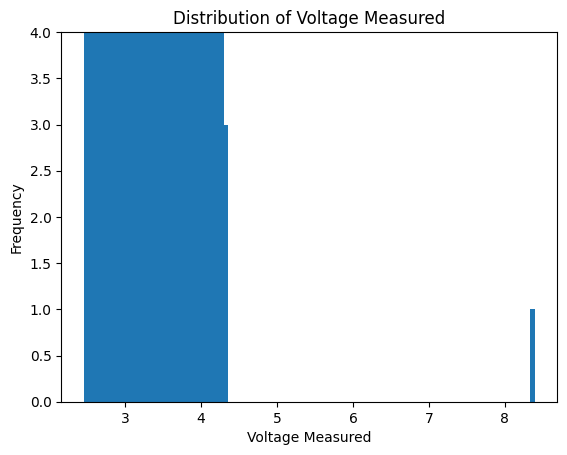

In [7]:
plt.hist(df['voltage_measured'], bins = 100)
plt.xlabel('Voltage Measured')
plt.ylabel('Frequency')
plt.title('Distribution of Voltage Measured')
plt.ylim(0,4)
plt.show()

As shown above, there is only a singular value above 4.xxxx, making the maximum vlaue shown above a clear outlier. We need to remove this value and so shall remove it.

In [8]:
value = df['voltage_measured'].max()
df = df[df['voltage_measured'] != value]

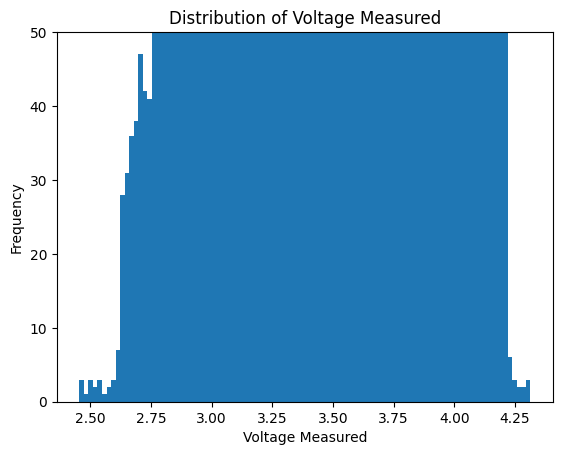

In [9]:
plt.hist(df['voltage_measured'], bins = 100)
plt.xlabel('Voltage Measured')
plt.ylabel('Frequency')
plt.title('Distribution of Voltage Measured')
plt.ylim(0,50)
plt.show()

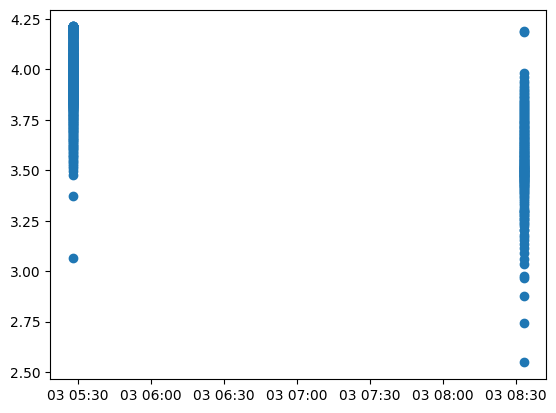

In [10]:
cycle = 5
plt.scatter(df[df['cycle'] == cycle]['datetime'], df[df['cycle'] == cycle]['voltage_measured'])

In [11]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    df['SOC'] = ((df['voltage_measured'] - 2.7)/(df['voltage_measured'].max() - 2.7))

df.head()

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,current,voltage,time,capacity,SOC
0,1,24,2008-04-02 13:08:17,3.873017,-0.001201,24.655358,0.000,0.003,0.000,1.856487,0.726910
1,1,24,2008-04-02 13:08:17,4.206466,0.060136,24.241571,0.057,4.250,5314.703,1.856487,0.933546
2,1,24,2008-04-02 13:08:17,4.206558,0.057209,24.230457,0.057,4.250,5329.485,1.856487,0.933602
3,1,24,2008-04-02 13:08:17,4.205512,0.050194,24.241984,0.047,4.245,5344.282,1.856487,0.932955
4,1,24,2008-04-02 13:08:17,4.205301,0.047004,24.226732,0.047,4.245,5359.141,1.856487,0.932824


# Machine Learning (DBN)

Now we begin to build our Deep Belief Network

In [12]:
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input, Dense
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from tensorflow import keras

In [13]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [14]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [15]:
prep_df = df.drop(['datetime', 'ambient_temperature', 'capacity'], axis = 1)
train_dataset = prep_df.sample(frac=0.8, random_state = 0)
test_dataset = prep_df.drop(train_dataset.index)

In [16]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cycle,470278.0,95.409326,42.773550,1.000000,60.000000,96.000000,132.000000,168.000000
voltage_measured,470278.0,4.103417,0.213920,2.471315,4.087951,4.205138,4.205908,4.313703
current_measured,470278.0,0.368397,0.909215,-4.479660,0.039570,0.171744,1.262769,1.530376
temperature_measured,470278.0,26.375034,2.778459,23.214802,24.489700,25.483258,27.353311,41.436500
current,470278.0,0.635259,0.737868,-4.468000,0.057000,0.261000,1.498000,1.998400
voltage,470278.0,4.021590,1.212991,0.000000,4.240000,4.305000,4.656000,5.002000
time,470278.0,4764.131279,3149.310763,0.000000,1925.250000,4465.765000,7505.461250,10807.328000
SOC,470278.0,0.869687,0.132564,-0.141715,0.860103,0.932723,0.933200,1.000000


## Normalisation

Here we will normalise the values to give equal weight to each feature

In [17]:
# Test data is *not* used when calculating the mean and std.
mean = train_dataset.mean(axis=0)
std = train_dataset.std(axis=0)
train_dataset = (train_dataset - mean) / std
test_dataset = (test_dataset - mean) / std

train_dataset.head()  # First training sample, normalized

,cycle,voltage_measured,current_measured,temperature_measured,current,voltage,time,SOC
489564,1.135998,-0.142636,1.256754,0.213179,1.169235,0.656567,-1.209409,-0.142636
383689,0.528146,0.460087,-0.403915,-0.702922,-0.860939,-3.312958,1.751353,0.460087
580550,1.673714,0.477688,-0.315403,-0.783657,-0.752518,0.197372,0.651658,0.477688
110451,-1.038243,0.484764,-0.370965,-0.158375,-0.818926,0.180059,1.414345,0.484764
354821,0.364493,0.483930,0.786718,1.419882,0.594606,0.598858,-0.741414,0.483930


In [18]:
# These are the features
train_features = train_dataset.copy()
test_features = test_dataset.copy()
print(train_features.iloc[0])
# These contain the target variables
train_labels = train_features.pop('SOC')
test_labels = test_features.pop('SOC')
print('--------------------------')
print(train_features.iloc[0])

cycle                   1.135998
voltage_measured       -0.142636
current_measured        1.256754
temperature_measured    0.213179
current                 1.169235
voltage                 0.656567
time                   -1.209409
SOC                    -0.142636
Name: 489564, dtype: float64
--------------------------
cycle                   1.135998
voltage_measured       -0.142636
current_measured        1.256754
temperature_measured    0.213179
current                 1.169235
voltage                 0.656567
time                   -1.209409
Name: 489564, dtype: float64


In [19]:
train_dataset.head()

,cycle,voltage_measured,current_measured,temperature_measured,current,voltage,time,SOC
489564,1.135998,-0.142636,1.256754,0.213179,1.169235,0.656567,-1.209409,-0.142636
383689,0.528146,0.460087,-0.403915,-0.702922,-0.860939,-3.312958,1.751353,0.460087
580550,1.673714,0.477688,-0.315403,-0.783657,-0.752518,0.197372,0.651658,0.477688
110451,-1.038243,0.484764,-0.370965,-0.158375,-0.818926,0.180059,1.414345,0.484764
354821,0.364493,0.483930,0.786718,1.419882,0.594606,0.598858,-0.741414,0.483930


In [20]:
num_rows = train_features.shape[1]
num_rows

7

## Regression with DBN

In [40]:
def build_and_compile_model():
    # Define the model architecture
    model = keras.models.Sequential()

    # Input layer
    model.add(Dense(64, input_dim=num_rows, activation='relu'))

    # Hidden layers
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))

    # Output layer - since we're doing regression, we have a single output node with no activation function
    model.add(Dense(1))

    # Compile the model - using Mean Squared Error (MSE) as the loss function for regression
    model.compile(optimizer=keras.optimizers.Adam(), loss='mean_squared_error', 
                  metrics=['mean_squared_error', 'mean_absolute_error'])
    return model
                 

def plot_loss(history, title):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    # plt.ylim([0, 1])
    plt.xlabel('Epoch')
    plt.ylabel('Error [SOC]')
    plt.title(title)
    plt.legend()
    plt.grid(True)

In [41]:
dbn_model = build_and_compile_model()
dbn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                512       
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 25,473
Trainable params: 25,473
Non-trainable params: 0
_________________________________________________________________


In [45]:
epochs = 40
checkpoint_filepath = os.path.join('checkpoints', 'DBN_SOC{epoch:02d}-{val_loss:.4f}.h5')
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='mean_squared_error',
    mode='min',
    save_best_only=True)

if 'history' not in locals():
    print('New History array has been created')
    history =  []

In [53]:
%%time
history.append(dbn_model.fit(
    train_features,
    train_labels,
    validation_split = 0.2,
    epochs = epochs,
    callbacks = model_checkpoint_callback))

Epoch 1/40
11757/11757 [==============================] - 61s 5ms/step - loss: 8.4620e-05 - mean_squared_error: 8.4620e-05 - mean_absolute_error: 0.0036 - val_loss: 3.6121e-05 - val_mean_squared_error: 3.6121e-05 - val_mean_absolute_error: 0.0035
Epoch 2/40
11757/11757 [==============================] - 60s 5ms/step - loss: 5.1630e-05 - mean_squared_error: 5.1630e-05 - mean_absolute_error: 0.0032 - val_loss: 4.4346e-05 - val_mean_squared_error: 4.4346e-05 - val_mean_absolute_error: 0.0038
Epoch 3/40
11757/11757 [==============================] - 62s 5ms/step - loss: 6.4997e-05 - mean_squared_error: 6.4997e-05 - mean_absolute_error: 0.0027 - val_loss: 2.8128e-04 - val_mean_squared_error: 2.8128e-04 - val_mean_absolute_error: 0.0094
Epoch 4/40
11757/11757 [==============================] - 61s 5ms/step - loss: 4.0650e-05 - mean_squared_error: 4.0650e-05 - mean_absolute_error: 0.0022 - val_loss: 3.2130e-06 - val_mean_squared_error: 3.2130e-06 - val_mean_absolute_error: 0.0013
Epoch 5/40
1

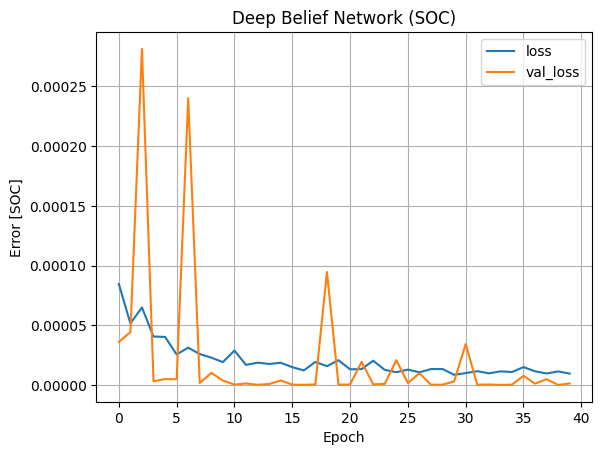

In [54]:
plot_loss(history[-1], 'Deep Belief Network (SOC)')

In [55]:
test_results = {}
test_results['dbn_model'] = dbn_model.evaluate(test_features, test_labels, verbose=0)

In [21]:
model_path = os.path.join("models","DBN_SOC_02.keras")

In [57]:
dbn_model.save(model_path)

### Performance

In [22]:
dbn_model = tf.keras.models.load_model(model_path)

In [23]:
test_predictions = dbn_model.predict(test_features).flatten()

3675/3675 [==============================] - 9s 2ms/step


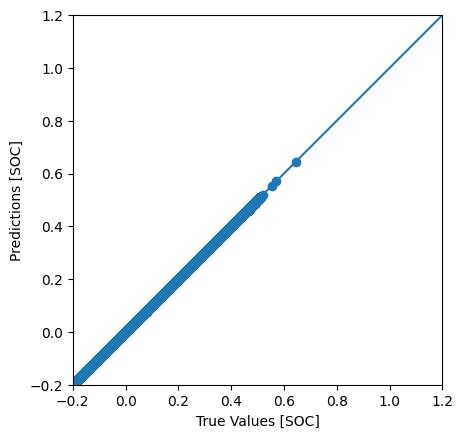

In [24]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [SOC]')
plt.ylabel('Predictions [SOC]')
lims = [-0.2, 1.2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

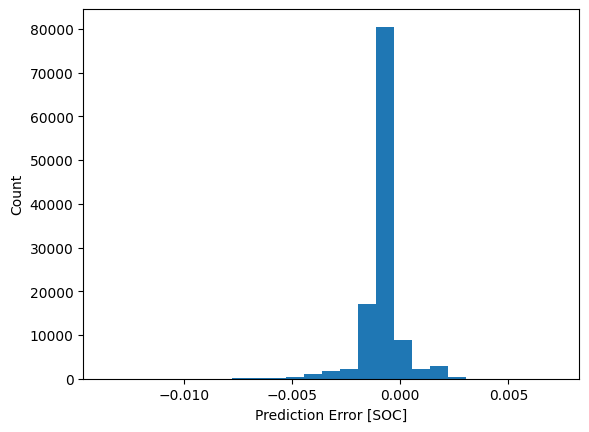

In [25]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [SOC]')
_ = plt.ylabel('Count')

In [27]:
# Calculate metrics
mse = mean_squared_error(test_labels, test_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_labels, test_predictions)
r2 = r2_score(test_labels, test_predictions)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2 Score: {r2}')

MSE: 1.4263933327219569e-06
RMSE: 0.0011943170988987627
MAE: 0.0009283793443047292
R2 Score: 0.9999985636587748
